In [1]:
from __future__ import print_function

import os
import time
import datetime
import random
import json
import argparse
import numpy as np
import tensorflow
import tensorflow.keras.backend as K
from tensorflow.keras.applications import densenet
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd
import random

import tensorflow
import cv2

In [2]:
train_path = '../anaconda3/BoneFractureDetectionMURA/MURA-v1.1/train/XR_FOREARM'

In [3]:
def load_path(root_path = train_path):
	
	'''
	load MURA dataset

	'''
	Path = []
	labels = []
	for root,dirs,files in os.walk(root_path): #Read all pictures, os.walk Return to iterator genertor Traverse all files
		for name in files:
			if str(name[0]) != '.':
				path_1 = os.path.join(root,name)
				Path.append(path_1)

			
			if root.split('_')[-1]=='positive':  #positive Label is 1, otherwise 0
				labels+=[1]  #Last level directory file patient11880\\study1_negative\\image3.png
			elif root.split('_')[-1]=='negative':
				labels+=[0]

# 	labels = np.asarray(labels)
	return Path, labels

In [4]:
X_path, X_label = load_path()

print(X_label[:100])

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]


In [5]:
# y = X_label

In [6]:
print(len(X_path))
print(len(X_label))
for i in range(3):
    print(X_path[i])


1825
1825
../anaconda3/BoneFractureDetectionMURA/MURA-v1.1/train/XR_FOREARM/patient09592/study1_negative/image1.png
../anaconda3/BoneFractureDetectionMURA/MURA-v1.1/train/XR_FOREARM/patient09592/study1_negative/image2.png
../anaconda3/BoneFractureDetectionMURA/MURA-v1.1/train/XR_FOREARM/patient03894/study1_negative/image1.png


In [7]:
def random_rotation_flip(image,size = 224):
	if random.randint(0,1):
		image = cv2.flip(image,1) # 1-->horizontal flip 0-->Vertical flip -1-->Horizontal and vertical

	if random.randint(0,1):
		angle = random.randint(-30,30)
		M = cv2.getRotationMatrix2D((size/2,size/2),angle,1)
		#The third parameter: the size of the transformed image
		image = cv2.warpAffine(image,M,(size,size))
	return image

def load_image(Path = X_path, size = 224):
    
	Images = []
	for path in Path:
		try:
			image = cv2.imread(path,cv2.IMREAD_COLOR)
			image = cv2.resize(image,(size,size))
			image = random_rotation_flip(image,size)
			Images.append(image)

		except Exception as e:
			print(str(e))

	Images = np.asarray(Images).astype('float32')

	mean = np.mean(Images)			#normalization
	std = np.std(Images)
	Images = (Images - mean) / std
	
# 	if K.image_data_format() == "channels_first":
# 		Images = np.expand_dims(Images,axis=1)		   #Extended dimension 1
# 	if K.image_data_format() == "channels_last":
# 		Images = np.expand_dims(Images,axis=3)             #Extended dimension 3(usebackend tensorflow:aixs=3; theano:axixs=1) 
	return Images

In [8]:
X_train = load_image()

In [9]:
print(X_train.shape)

(1825, 224, 224, 3)


In [10]:
# converts a greyscale array to rgb by extending the last axis from 1 to 3
# X_train = np.repeat(X_train_greyscale, 3, -1)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
c = 5
# for i in range(c):
#     plt.subplot(5 / c+1, c, i + 1)
#     plt.imshow(images_by_pixel_values)
# abc = X_train[0][0:5][0:5,0:5][0:5,0:5]
# print(abc)
# print(abc.shape)
# for i in range(5):
#     plt.subplot(5 / c+1, c, i + 1)
#     plt.imshow(abc)

<Figure size 360x360 with 0 Axes>

In [12]:
# plt.plot(X_train)
print(len(X_label))
print(len(X_train))

1825
1825


In [13]:
def convertToOneHot(vector, num_classes=None):
    """
    Converts an input 1-D vector of integers into an output
    2-D array of one-hot vectors, where an i'th input value
    of j will set a '1' in the i'th row, j'th column of the
    output array.

    Example:
        v = np.array((1, 0, 4))
        one_hot_v = convertToOneHot(v)
        print one_hot_v

        [[0 1 0 0 0]
         [1 0 0 0 0]
         [0 0 0 0 1]]
    """

    assert isinstance(vector, np.ndarray)
    assert len(vector) > 0

    if num_classes is None:
        num_classes = np.max(vector)+1
    else:
        assert num_classes > 0
        assert num_classes >= np.max(vector)

    result = np.zeros(shape=(len(vector), num_classes))
    result[np.arange(len(vector)), vector] = 1
    return result.astype(int)

import seaborn as sns




In [14]:
#Convert list to numpy array

In [15]:
X = np.array(X_train)
y_raw = np.array(X_label)

In [16]:
#One hot encode the training labels
y = convertToOneHot(y_raw)


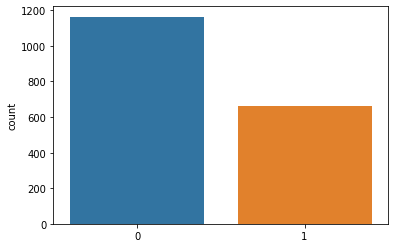

In [17]:
sns.countplot(y_raw)

In [18]:
X[0]

array([[[-1.0181305, -1.0181305, -1.0181305],
        [-1.0181305, -1.0181305, -1.0181305],
        [-1.0181305, -1.0181305, -1.0181305],
        ...,
        [-1.0181305, -1.0181305, -1.0181305],
        [-1.0181305, -1.0181305, -1.0181305],
        [-1.0181305, -1.0181305, -1.0181305]],

       [[-1.0181305, -1.0181305, -1.0181305],
        [-1.0181305, -1.0181305, -1.0181305],
        [-1.0181305, -1.0181305, -1.0181305],
        ...,
        [-1.0181305, -1.0181305, -1.0181305],
        [-1.0181305, -1.0181305, -1.0181305],
        [-1.0181305, -1.0181305, -1.0181305]],

       [[-1.0181305, -1.0181305, -1.0181305],
        [-1.0181305, -1.0181305, -1.0181305],
        [-1.0181305, -1.0181305, -1.0181305],
        ...,
        [-1.0181305, -1.0181305, -1.0181305],
        [-1.0181305, -1.0181305, -1.0181305],
        [-1.0181305, -1.0181305, -1.0181305]],

       ...,

       [[-1.0181305, -1.0181305, -1.0181305],
        [-1.0181305, -1.0181305, -1.0181305],
        [-1.0181305, -

In [19]:
print("Shape of train images is: ", X.shape)
print("Shape of labels is: ", y.shape)
print(X[0][0].shape)

Shape of train images is:  (1825, 224, 224, 3)
Shape of labels is:  (1825, 2)
(224, 3)


In [20]:
#Test train split
from sklearn.model_selection import train_test_split
import pickle

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state=3)

# pickle_out = open("X_train", "wb")
# pickle.dump(X_train, pickle_out)
# pickle_out.close()

# pickle_out = open("X_val", "wb")
# pickle.dump(X_val, pickle_out)
# pickle_out.close()

# pickle_out = open("y_train", "wb")
# pickle.dump(y_train, pickle_out)
# pickle_out.close()

# pickle_out = open("y_val", "wb")
# pickle.dump(y_val, pickle_out)
# pickle_out.close()


#Test the split of 0's and 1's in training and validation labels
pos_train =0
neg_train = 0
pos_val = 0
neg_val = 0


for i in range(1,len(y_train)):
    if y_train[i][0] == 1:
        pos_train = pos_train + 1
    else:
        neg_train = neg_train + 1
        
for i in range(1,len(y_val)):
    if y_val[i][0] == 1:
        pos_val = pos_val + 1
    else:
        neg_val = neg_val + 1
        
print("Positive in training: " + str(pos_train))
print("Negative in training: " + str(neg_train))
print("Train pos/neg ratio: " + str (pos_train/neg_train))
      
print("Positive in test: " + str(pos_val))
print("Negative in test: " + str(neg_val))
print("Test pos/neg ratio: " + str (pos_val/neg_val))

Positive in training: 852
Negative in training: 515
Train pos/neg ratio: 1.654368932038835
Positive in test: 311
Negative in test: 145
Test pos/neg ratio: 2.1448275862068966


In [22]:
print("Shape of Training images is: ", X_train.shape)
print("Shape of Validation images is: ", X_val.shape)
print("Shape of Training labels is: ", y_train.shape)
print("Shape of Validation labels is: ", y_val.shape)

Shape of Training images is:  (1368, 224, 224, 3)
Shape of Validation images is:  (457, 224, 224, 3)
Shape of Training labels is:  (1368, 2)
Shape of Validation labels is:  (457, 2)


In [23]:
ntrain = len(X_train)
print("Number of training images: ", ntrain)
nval = len(X_val)
print("Number of validation images: ",nval)

batch_size = 20

Number of training images:  1368
Number of validation images:  457


In [24]:
# def conv_factory(x, nb_filter, dropout_rate=None, weight_decay=1E-4):
#     """Apply BatchNorm, Relu 3x3Conv2D, optional dropout

#     :parameter x: Input keras network
#     :parameter concat_axis: int -- index of contatenate axis
#     :parameter nb_filter: int -- number of filters
#     :parameter dropout_rate: int -- dropout rate
#     :parameter weight_decay: int -- weight decay factor

#     :returns: keras network with b_norm, relu and Conv2D added
#     :return type: keras network
#     """
#     x = BatchNormalization(gamma_regularizer=l2(weight_decay), beta_regularizer=l2(weight_decay))(x)
#     x = Activation('relu')(x)
#     x = Conv2D(nb_filter, (1, 1), kernel_initializer="he_uniform", padding="same", use_bias=False, kernel_regularizer=l2(weight_decay))(x)
#     x = BatchNormalization(gamma_regularizer=l2(weight_decay), beta_regularizer=l2(weight_decay))(x)
#     x = Activation('relu')(x)
#     x = Conv2D(nb_filter, (3, 3), kernel_initializer="he_uniform", padding="same", use_bias=False, kernel_regularizer=l2(weight_decay))(x)
#     if dropout_rate:
#         x = Dropout(dropout_rate)(x)

#     return x

# def denseblock(x, nb_layers, nb_filter, growth_rate, dropout_rate=None, weight_decay=1E-4):
#     """
#     Build a denseblock where the output of each conv_factory is fed to subsequent ones

#     :parameter x: keras model
#     :parameter concat_axis: int -- index of contatenate axis
#     :parameter nb_layers: int -- the number of layers of conv_factory to append to the model.
#     :parameter nb_filter: int -- number of filters
#     :parameter dropout_rate: int -- dropout rate
#     :parameter weight_decay: int -- weight decay factor

#     :returns: keras model with nb_layers of conv_factory appended
#     :return type: keras model

#     """

#     list_feat = [x]

#     for i in range(nb_layers):
#         x = conv_factory(x, growth_rate,
#                          dropout_rate, weight_decay)
#         list_feat.append(x)
#         x = Concatenate()(list_feat)
#         nb_filter += growth_rate
#         #print (nb_filter)

#     return x, nb_filter

# def transition(x, nb_filter, dropout_rate=None, weight_decay=1E-4):
#     """Apply BatchNorm, Relu 1x1Conv2D, optional dropout and Maxpooling2D

#     :parameter x: keras model
#     :parameter concat_axis: int -- index of contatenate axis
#     :parameter nb_filter: int -- number of filters
#     :parameter dropout_rate: int -- dropout rate
#     :parameter weight_decay: int -- weight decay factor

#     :returns: model
#     :return type: keras model, after applying batch_norm, relu-conv, dropout, maxpool

#     """

#     x = BatchNormalization(gamma_regularizer=l2(weight_decay), beta_regularizer=l2(weight_decay))(x)
#     x = Activation('relu')(x)
#     x = Conv2D(nb_filter, (1, 1), kernel_initializer="he_uniform", padding="same", use_bias=False, kernel_regularizer=l2(weight_decay))(x)
#     if dropout_rate:
#         x = Dropout(dropout_rate)(x)
#     x = AveragePooling2D((2, 2), strides=(2, 2))(x)

#     return x


########################################################################################
# nb_classes = 1
# img_dim = [256,256,3]
# nb_filter = 3
# nb_dense_block = 4
# growth_rate = 32
# dropout_rate = 0.5
# depth = 34
# weight_decay = 0.01

# model_input = Input(shape=img_dim)

# assert (depth - 4) % 3 == 0, "Depth must be 3 N + 4"

# # layers in each dense block
# nb_layers = int((depth - 4) / 3)

# # Initial convolution
# x = Conv2D(nb_filter, (7, 7), strides=(2, 2), kernel_initializer="he_uniform", padding="same", name="initial_conv2D", use_bias=False, kernel_regularizer=l2(weight_decay))(model_input)

# # Add dense blocks
# nb_layers1 = [6,12,32,32,48,32,48,64,32]  #3*3 convolutional layer of each denseblock ，
# for block_idx in range(nb_dense_block - 1):
#     x, nb_filter = denseblock(x, nb_layers1[block_idx], nb_filter, growth_rate, dropout_rate=dropout_rate, weight_decay=weight_decay)
#     # add transition
#     x = transition(x,nb_filter, dropout_rate=dropout_rate, weight_decay=weight_decay)

# # The last denseblock does not have a transition
# x, nb_filter = denseblock(x, nb_layers1[nb_dense_block-1], nb_filter, growth_rate, dropout_rate=dropout_rate, weight_decay=weight_decay)

# x = BatchNormalization(gamma_regularizer=l2(weight_decay), beta_regularizer=l2(weight_decay))(x)
# x = Activation('relu')(x)
# x = GlobalAveragePooling2D(data_format=K.image_data_format())(x)
# x = Dense(nb_classes, activation='sigmoid', kernel_regularizer=l2(weight_decay), bias_regularizer=l2(weight_decay))(x)

# head_model = models.Model(inputs=[model_input], outputs=[x], name="DenseNet")
###########################################################################################

##########################################################################################
#number of classes in your dataset e.g. 20
# num_classes = 1

# base_model = tensorflow.keras.applications.VGG16(include_top = False, weights = 'imagenet',  input_shape = [256, 256, 3], pooling = max, classes = 2)
# for layer in base_model.layers:
#     layer.trainable = False

# x = base_model.output
# x = Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(256,256,3))(x)
# x = Conv2D(64, (3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)
# x = Flatten()(x)
# x = Dense(4096, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = BatchNormalization()(x)

# predictions = Dense(num_classes, activation = 'relu')(x)

# head_model = models.Model(base_model.input, predictions)

#############################################################################################


# dense201_model = densenet.DenseNet201(include_top = False, weights = 'imagenet',  input_shape = [512, 512, 3], pooling = max)
# # Dont train existing weights
# for layer in dense201_model.layers:
#     layer.trainable = False
    
# x = Flatten()(dense201_model.output)
# #### No dropout layer added


# prediction = Dense(1, activation = 'relu')(x)
# model = models.Model(inputs = dense201_model.input, outputs = prediction)

# head_model.get_config()

#############################################################################################

# inception = InceptionV3(include_top=False, weights='imagenet', input_tensor=inp, input_shape=IMG_SIZE, pooling='avg')
# # for layer in inception.layers:
# #     layer.trainable = False

# input_layer = inception.inputs
# # last_layer = inception.get_layer(index=-1)
# # inception_layers = models.Model(inputs=input_layer, outputs=last_layer.output)
# # print(last_layer)

In [25]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import InceptionV3, MobileNetV2, DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D

import matplotlib.image as mpimg

In [26]:
# x_train_preprocessed = preprocess_input(X_train)
# x_val_preprocessed = preprocess_input(X_val)
# y_train_preprocessed = preprocess_input(y_train)
# y_val_preprocessed = preprocess_input(y_val)


# x_train_features = inception_layers.predict(X_train)
# x_val_features = inception_layers.predict(X_val)

In [35]:
IMG_SIZE = (224,224,3)
inp = Input(IMG_SIZE)

densenet = DenseNet121(include_top=False, weights='imagenet', input_tensor=inp, input_shape=IMG_SIZE, pooling='max')
input_layer=densenet.inputs

x = densenet.output
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(2, activation='softmax', name='predictions')(x)

# Create your own model
feature_model = models.Model(input_layer, preds)

feature_model.trainable = True
#optimizer : RMS Prop
#loss : binary_crossentropy because it is a binary classification
# lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-3,
#     decay_rate=0.9)
opt = SGD(learning_rate=0.001, momentum=0.0, nesterov = True, name="SGD")

# I let the last 3 blocks train
for layer in feature_model.layers[:-60]:
    layer.trainable = False
for layer in feature_model.layers[-60:]:
    layer.trainable = True

feature_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])


In [36]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range = 30,
                                  width_shift_range=0.3,
                                  height_shift_range=0.3,
                                  shear_range=0.3,
                                  zoom_range=0.3,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  data_format='channels_last')

val_datagen = ImageDataGenerator(rescale = 1./255)

In [37]:
# Create the image generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [38]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard


In [39]:
%tensorboard --logdir /log/mobilenetv2/50\ Layers\ Trained/

Reusing TensorBoard on port 6012 (pid 9556), started 0:54:22 ago. (Use '!kill 9556' to kill it.)

In [40]:
earlystop = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=1, mode='auto', baseline=None, restore_best_weights=False)
modelcheckpoint = tensorflow.keras.callbacks.ModelCheckpoint(filepath='keras_mobilenetv2_model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True, monitor='val_acc', mode='max')

log_dir = "./log/mobilenetv2/50 Layers Trained/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tensorflow.keras.callbacks.TensorBoard(log_dir, histogram_freq=1, write_graph=True, update_freq='batch', embeddings_freq=0, embeddings_metadata=None)

reducelr = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, mode='auto', cooldown=0)
progbar = tensorflow.keras.callbacks.ProgbarLogger(count_mode='samples')

my_callbacks = [
    earlystop,
    modelcheckpoint,
    tensorboard,
    reducelr,
    progbar,
]

EPOCHS = 50

In [41]:
feature_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [42]:
# Training the model

history = feature_model.fit_generator(train_generator,
                                    steps_per_epoch = ntrain // batch_size,
                                    epochs = EPOCHS,
                                    validation_data = val_generator,
                                    verbose=1,
                                    callbacks=my_callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 68 steps, validate for 23 steps
Epoch 1/50
Epoch 1/50
68/68 [==============================] - 138s 2s/step - loss: 0.8707 - acc: 0.5861 - val_loss: 0.6853 - val_acc: 0.5996
Epoch 2/50
Epoch 2/50
68/68 [==============================] - 140s 2s/step - loss: 0.6942 - acc: 0.6469 - val_loss: 0.6541 - val_acc: 0.6740
Epoch 3/50
Epoch 3/50
68/68 [==============================] - 141s 2s/step - loss: 0.6314 - acc: 0.6773 - val_loss: 0.6923 - val_acc: 0.5427
Epoch 4/50
Epoch 4/50
68/68 [==============================] - 137s 2s/step - loss: 0.6040 - acc: 0.6914 - val_loss: 0.6577 - val_acc: 0.6718
Epoch 5/50
Epoch 5/50
68/68 [==============================] - 137s 2s/step - loss: 0.6009 - acc: 0.7025 - val_loss: 0.7151 - val_acc: 0.3589
Epoch 6/50
Epoch 6/50
68/68 [==============================] - 141s 2s/step - loss: 0.5758 - acc: 0.6988 - val_loss: 0.657

In [43]:
# Save the model

feature_model.save_weights('denenet121_forearm_fracture_detection_weights.h5')
feature_model.save('denenet121_forearm_fracture_detection_model.h5')

In [44]:
# serialize model to JSON
model_json = feature_model.to_json()
with open("denenet121_forearm_fracture_detection_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5

print("Saved model to disk")

Saved model to disk


In [45]:
# Plot train and validation curves
# get the details from history object

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

OSError: [Errno 30] Read-only file system: '/1-1.png'

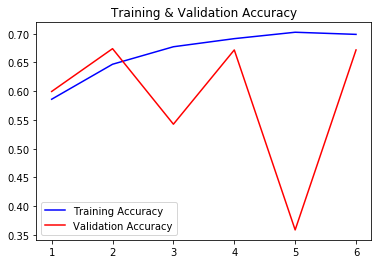

<Figure size 432x288 with 0 Axes>

In [46]:
#train and val accuracy
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()


plt.figure()
plt.savefig('/1-1.png')

In [ ]:
# Train and val loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()


plt.show()
plt.savefig('/1-2.png')